# Plot Paper Results: Figure 4 (Main Manuscript) and Figure 3 (Supplementary)
This notebook shows how to read and plot raw numbers from Figure 4 in our [Action Search main manuscript](http://openaccess.thecvf.com/content_ECCV_2018/papers/Humam_Alwassel_Action_Search_Spotting_ECCV_2018_paper.pdf) and Figure 3 in our [supplementary material](http://humamalwassel.com/pdf/action-search-supplementary.pdf).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from matplotlib import rc
import matplotlib as mpl
# Global config.
params = {
   'font.family': 'serif','font.serif': 'Times',
   'text.usetex': True, # set it to false if LaTex is not installed in your machine
   'xtick.major.size': 8,
   'ytick.major.size': 8,
   'xtick.major.width': 3,
   'ytick.major.width': 3,
    'mathtext.fontset': 'custom',
   }
mpl.rcParams.update(params)

%matplotlib inline

## Figure 4 in Main Manuscript:  Action Spotting Results on AVA

In [2]:
# Getting data for Figure 4
results_df = pd.read_csv('action-spotting-results-on-ava.csv')
coverage = results_df['coverage']
action_search = results_df['action-search']
random_sampler = results_df['random-sampler']
direction_baseline = results_df['direction-baseline']

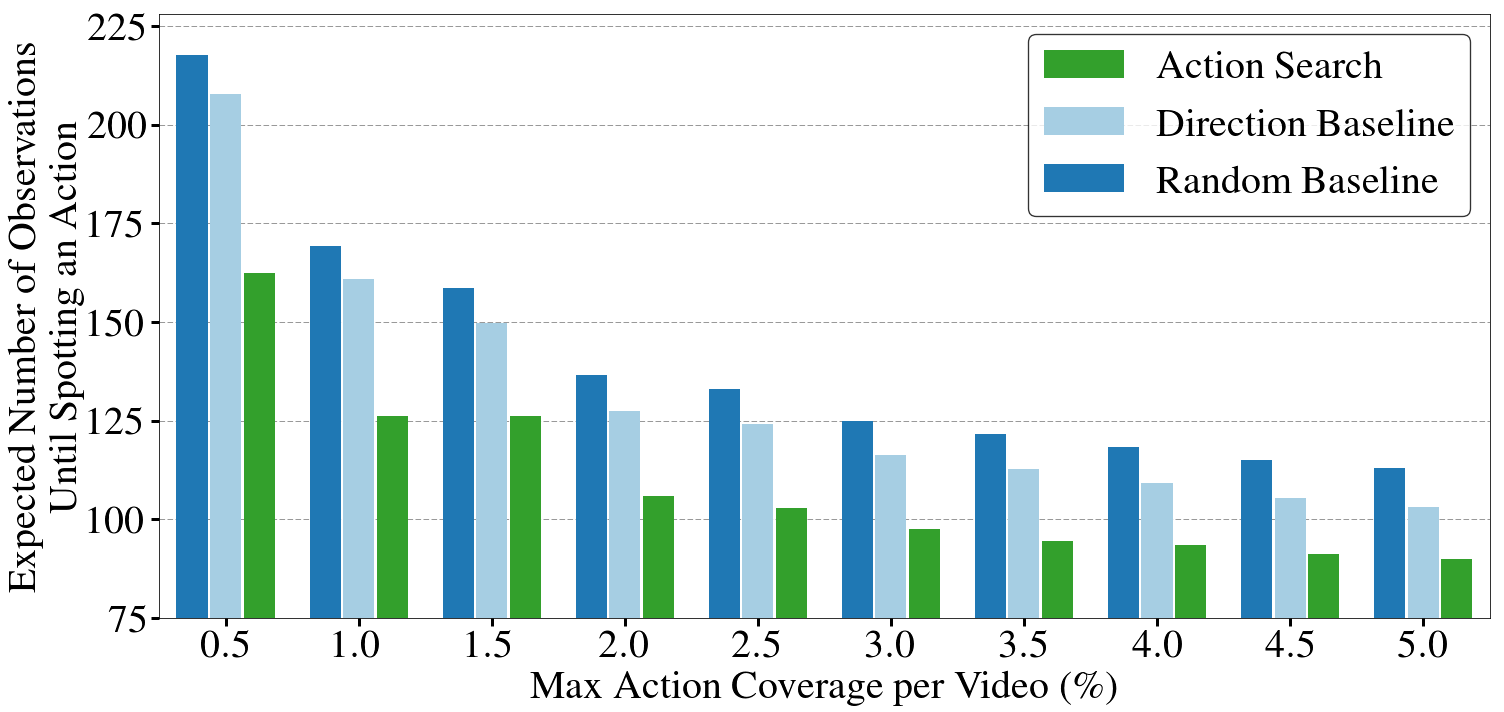

In [3]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

fontsize = 40
bar_width = 0.175*2/3
spacing = bar_width + 0.01

plt.bar([float(i)*100+spacing for i in coverage], 
        action_search, width=bar_width,color='#33a02c',label='Action Search')
plt.bar([float(i)*100 for i in coverage], 
        direction_baseline, width=bar_width,color='#a6cee3',label='Direction Baseline')
plt.bar([float(i)*100-spacing for i in coverage], 
        random_sampler, width=bar_width,color='#1f78b4',label='Random Baseline')

ax.set_xlabel('Max Action Coverage per Video (\%)', fontsize=fontsize)
ax.set_ylabel('Expected Number of Observations\nUntil Spotting an Action', fontsize=fontsize)
lg = ax.legend(loc='best', fontsize=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)
fr = lg.get_frame()
fr.set_lw(1.333)
fr.set_edgecolor('k')

plt.ylim(ymin=75, ymax=228)
plt.xlim(xmin=0.25, xmax=5.25)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(np.linspace(0.5,5,10)))
plt.tight_layout()

plt.show()

## Figure 3 in Supplementary Material:  Proposal Results on ActivityNet $\cap$ THUMOS14


In [4]:
# Getting data for Figure 3
with open('supp-generalization-raw-results.json', 'r') as fobj:
    average_recall_data = json.load(fobj)

In [5]:
# Defining plot style
def scale_rgb(rgb):
    return np.array(rgb)/255.0

METHODS = {
    'turn-tap': {'legend': 'ActivityNet $\cap$ THUMOS-14 (Turn Tap)',
            'color': scale_rgb([117, 112, 179])},
    'cap-thumos14': {'legend': 'ActivityNet $\cap$ THUMOS-14 (DAPs)',
                     'color': scale_rgb([230, 171, 2])},
    'asearch': {'legend': 'ActivityNet $\cap$ THUMOS-14 (A-Search)',
                     'color': scale_rgb([51,160,44])}
}

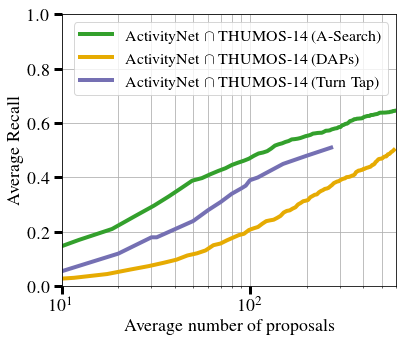

In [6]:
method_lst = ['asearch', 'cap-thumos14', 'turn-tap']
fn_size = 18
plt.figure(num=None, figsize=(6, 5))

# Plot Average Recall curve.
for method_key in method_lst:
    method = METHODS[method_key]
    average_nr_proposals = average_recall_data[method_key]['nr_proposals']
    average_recall = average_recall_data[method_key]['average_recall']
    plt.semilogx(average_nr_proposals, average_recall,
                 label=method['legend'], 
                 color=method['color'],
                 linewidth=4)
    
plt.ylabel('Average Recall', fontsize=fn_size)
plt.xlabel('Average number of proposals', fontsize=fn_size)
plt.grid(b=True, which="both")
plt.ylim([0, 1.0])
plt.xlim([10**1, 6*10**2])
plt.setp(plt.axes().get_xticklabels(), fontsize=fn_size)
plt.setp(plt.axes().get_yticklabels(), fontsize=fn_size)
plt.legend([METHODS[mid]['legend'] for mid in method_lst], 
           ncol=1, prop={'size': fn_size-2}, loc='best')
plt.show()